In [1]:
import qiskit as q
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from matplotlib import style
style.use("dark_background")
%matplotlib inline

# Creating instances for 2 different simulators
statevector_simulator = q.Aer.get_backend("statevector_simulator") # To plot the block vector
qasm_sim = q.Aer.get_backend("qasm_simulator") # To get the distribution outputs

def do_job(circuit):
    result = q.execute(circuit, backend = statevector_simulator).result()
    statevec = result.get_statevector()
    n_qubits = circuit.n_qubits
    circuit.measure([i for i in range(n_qubits)], [i for i in range(len(circuit.clbits))])
    
    qasm_job = q.execute(circuit, backend = qasm_sim, shots = 1024).result()
    counts = qasm_job.get_counts()
    
    return statevec, counts

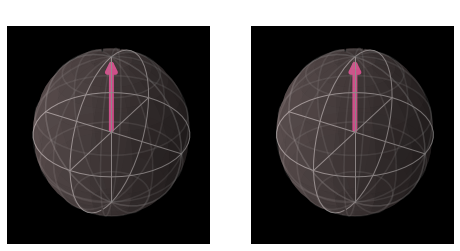

In [2]:
circuit = q.QuantumCircuit(2, 2)
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

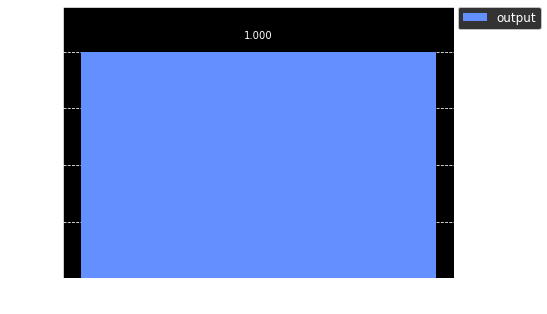

In [3]:
plot_histogram([counts], legend = ['output'])
# Collapses to a single value

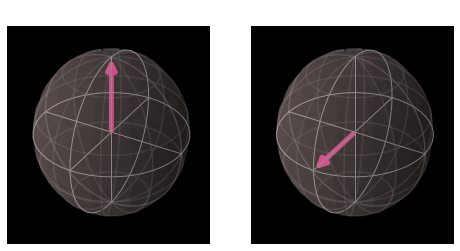

In [11]:
# Now qubit2 put to superposition state
circuit = q.QuantumCircuit(2, 2)
circuit.h(1) # Hadamard gate puts qubit 1 to superposition
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)
# Vector rotated on y axis

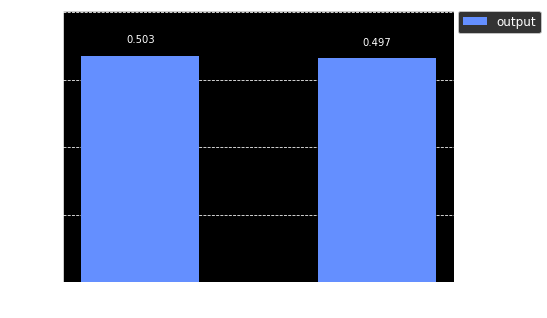

In [12]:
plot_histogram([counts], legend = ['output'])
# Clearly shows both qubits are entangled

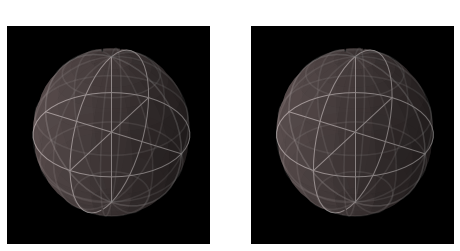

In [8]:
circuit = q.QuantumCircuit(2, 2)
circuit.h(0) # Hadamard gate puts qubit 0 to superposition
circuit.cx(0,1) # cnot to qubit 1
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)
# Vector collapses to the centre
# Change in one clearly affects the other

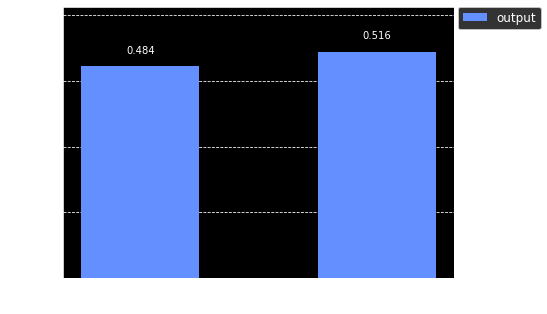

In [9]:
plot_histogram([counts], legend = ['output'])
# Superposition states and two are entangled so 50 % results

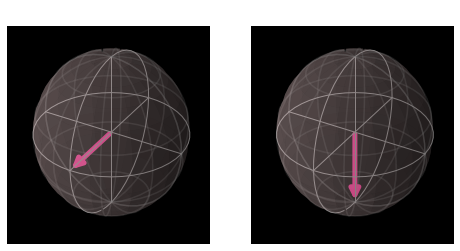

In [13]:
# Now qubit2 put to superposition state
circuit = q.QuantumCircuit(2, 2)
circuit.h(0) # Hadamard gate puts qubit 0 to superposition
circuit.x(1) # cnot to qubit 1
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)
# One is rotated along y axis 
# Another is rotated again due to not gate

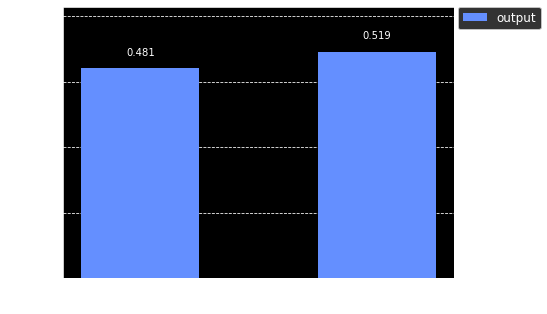

In [14]:
plot_histogram([counts], legend = ['output'] )

In [19]:
# 3 qubits architecture
circuit = q.QuantumCircuit(3, 3)
circuit.h(0) # Hadamard (qubit 0 in superposition)
circuit.h(1) # Hadamard (qubit 1 in superposition)
circuit.ccx(0, 1, 2) # control control not (qubit 0 & 1 controls qubit 2)
circuit.draw()

┌───┐     
q_0: |0>┤ H ├──■──
        ├───┤  │  
q_1: |0>┤ H ├──■──
        └───┘┌─┴─┐
q_2: |0>─────┤ X ├
             └───┘
 c_0: 0 ══════════
                  
 c_1: 0 ══════════
                  
 c_2: 0 ══════════

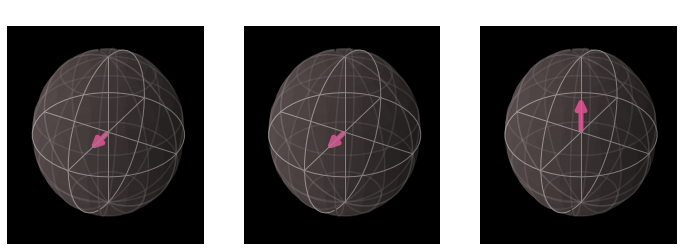

In [20]:
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

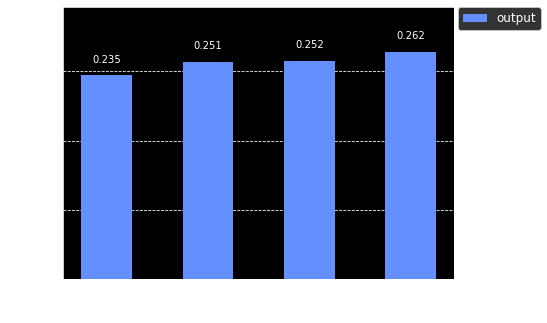

In [21]:
plot_histogram([counts], legend = ['output'])
# qubits in reverse
# 2nd bar 001 signifies q2 =1, q1=q0=0 
# Proving that below
# Probability of value being 1 for q1 and q0 is 50%
# Probability of value being 1 for q2 is 0.5 * 0.5 = 0.25 = 25%
# 75% times it must be a zero

In [22]:
# Proof
circuit = q.QuantumCircuit(3, 1)
circuit.h(0) # Hadamard (qubit 0 in superposition)
circuit.h(1) # Hadamard (qubit 1 in superposition)
circuit.ccx(0, 1, 2) # control control not (qubit 0 & 1 controls qubit 2)
circuit.measure([2], [0]) # measuring qubit2 and mapping it to a classical bit
circuit.draw()

┌───┐        
q_0: |0>┤ H ├──■─────
        ├───┤  │     
q_1: |0>┤ H ├──■─────
        └───┘┌─┴─┐┌─┐
q_2: |0>─────┤ X ├┤M├
             └───┘└╥┘
 c_0: 0 ═══════════╩═

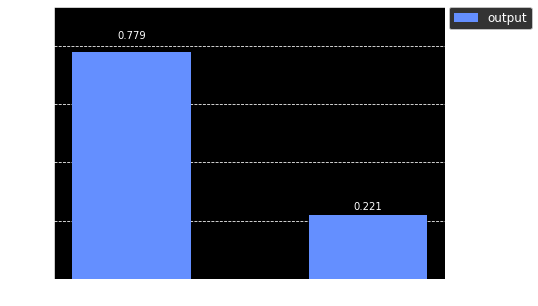

In [24]:
qasm_job = q.execute(circuit, backend = qasm_sim, shots = 1024).result()
counts = qasm_job.get_counts()
plot_histogram([counts], legend = ['output'])
# Probability of getting a zero = 75% and getting a one is 25%
# Ignore quantum noise

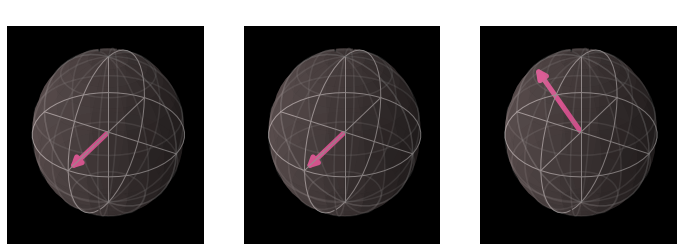

In [27]:
# 3 qubits rotation
import math
circuit = q.QuantumCircuit(3, 3)
circuit.h(0) # Hadamard (qubit 0 in superposition)
circuit.h(1) # Hadamard (qubit 1 in superposition)
circuit.rx(math.pi/4, 2) # rotate qubit 2 by pi/4
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

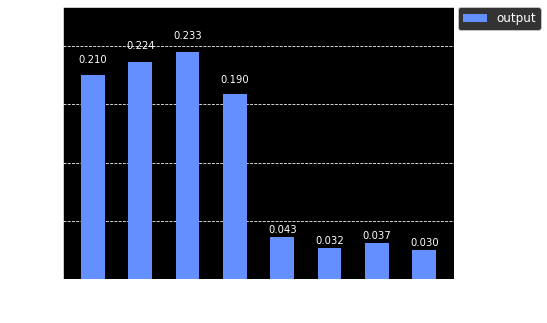

In [28]:
plot_histogram([counts], legend = ['output'])
# Here you see all possible combinations and it is not a quantum noise

In [29]:
# Checking out probability of 0 & 1 for qubit2
circuit = q.QuantumCircuit(3, 1)
circuit.h(0) # Hadamard (qubit 0 in superposition)
circuit.h(1) # Hadamard (qubit 1 in superposition)
circuit.rx(math.pi/4, 2) # control control not (qubit 0 & 1 controls qubit 2)
circuit.measure([2], [0]) # measuring qubit2 and mapping it to a classical bit
circuit.draw()

┌───┐       
q_0: |0>───┤ H ├───────
           ├───┤       
q_1: |0>───┤ H ├───────
        ┌──┴───┴───┐┌─┐
q_2: |0>┤ Rx(pi/4) ├┤M├
        └──────────┘└╥┘
 c_0: 0 ═════════════╩═

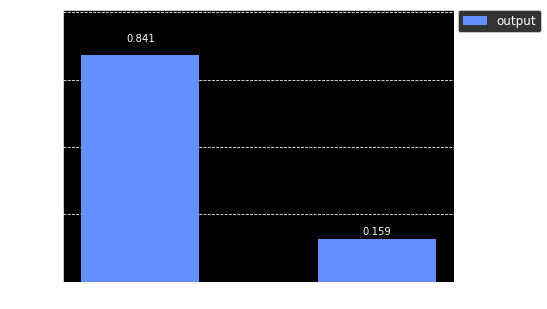

In [30]:
qasm_job = q.execute(circuit, backend = qasm_sim, shots = 1024).result()
counts = qasm_job.get_counts()
plot_histogram([counts], legend = ['output'])

In [ ]:
# Controlled rotation along y axis
# List of gates : https://qiskit.org/documentation/apidoc/circuit.html#gates-and-instructions
#github link to source code of quantum gates : github.com/Qiskit/qiskit-terra/tree/master/qiskit/extensions/standard